<p style="padding:5px;
          background-color:#afa;
          border:1px solid #bbffbb;
          border-radius:20px;
          font-weight:bold;
          font-size:2em;
          padding:15px;
          text-align:center;">
    TP ordonnancement : correction

<div style="margin-left:10%;margin-right:10%;border: 1px solid black;padding-top:5px;padding-left:5px;padding-bottom:10px;">
<center><b>⌛ Avant de commencer</b></center>
    
👉 Vous devez charger le module : `test_tp_ordonn_sjf.py` dans le document : 
    
👉 **icone ouvrir fichier puis choisir Installer le module**

</div>

---
<b><font color="blue" size="5"> L'ordonnancement SJF</font></b>

---



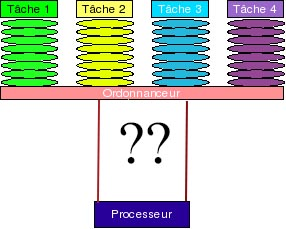

---
<b><font color="blue" size="5"> SDD : modéliser les processus</font></b>

---
 



Nous allons étudier la situation suivante : 

L'ordonnanceur va attribuer la CPU aux processus en suivant l'algorithme Shortest Job First (SJF).

Reprenons l'exemple étudié dans Wims. Voici les temps d'arrivée et les durées des 5 processus que nous allons traiter :

|processus|durée|arrivée|
|:--:|:--:|:--:|
|P1|3|0|
|P2|6|1|
|P3|4|4|
|P4|2|6|
|P5|1|7|


 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 1</font></b> 


  Chaque processus sera modélisé à l'aide d'un dictionnaire en python, avec les clefs `'name'` , `'duree'`et `'arrivee'`


**Ecrire les 5 dictionnaires `P1`, `P2`, `P3`, `P4` et `P5` puis créer une liste `processus` qui est une liste de dictionnaires contenant ces 5 processus**

In [ ]:
# A vous : 
# créer les 5 dictionnaires P1, P2, P3, P4 et P5 
# Créer la liste des processus
P1 = {'name': 'P1', 'duree': 3, 'arrivee': 0}
P2 = {'name': 'P2', 'duree': 6, 'arrivee': 1}
P3 = {'name': 'P3', 'duree': 4, 'arrivee': 4}
P4 = {'name': 'P4', 'duree': 2, 'arrivee': 6}
P5 = {'name': 'P5', 'duree': 1, 'arrivee': 7}

processus = [P1, P2, P3, P4, P5]

In [ ]:
# test de votre implémentation
from test_tp_ordonn_sjf import *
test_donnees(processus)


---
<b><font color="blue" size="5"> 1. Insérer les processus quand ils arrivent</font></b>

---

## 👉 Nous allons utiliser une liste Python des processus nommée  `liste_ordre_tours`.   
* Cette liste contient au rang 0 le processus **élu** en cours d'exécution, suivi des autres processus rangés dans l'ordre dans lequel ils doivent être exécutés par le protocole SJF.   
⚠️ Le premier élément (au rang 0) de cette liste sera toujours le processus élu en cours d'exécution. Aucun autre élément ne peut être placé "avant" lui.
* Cette liste est destinée à évoluer au fur et à mesure de l'arrivée des processus.
Chaque processus arrive à un temps donné, et doit être inséré à sa place.
  

    

## 🖐️ Exemples (différents du cas à traiter dans ce TP):
* Nous sommes avant le début d'arrivée des processus, la liste `liste_ordre_tours` est vide. Le premier processus qui arrive à t = 0, par exemple Pr1 d'une durée de 5, est inséré dans la liste. Il est forcément élu. Pour bien comprendre nous le renomons en `elu`. Nous avons donc   
`liste_ordre_tours = [elu]`

*  Un nouveau processus Pr2 arrive à t = 2, d'une durée de 3.  
  Il faut insérer Pr2 forcément après `elu`, quelle que soit sa durée (ici elle est plus petite).   
  `liste_ordre_tours = [elu, Pr2]`   

* Un nouveau processus Pr3 arrive à t = 3, d'une durée de 2.  
  Il faut insérer Pr3 forcément après `elu` qui est encore en cours d'exécution (durée 5), et avant Pr2.   
  `liste_ordre_tours = [elu, Pr3, Pr2]`    

* Un nouveau processus Pr4 arrive à t = 4, d'une durée de 8.  
  Il faut insérer Pr4 forcément après `elu` qui est encore en cours d'exécution (durée 5), après Pr2.   
  `liste_ordre_tours = [elu, Pr3, Pr2, Pr4]`   
    







 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 2</font></b> 

Complétez le code de la procédure `inserer` :

In [ ]:
def inserer(liste_ordre, P) :
    """
    :param liste_ordre: la liste des processus rangée pour traitement par CPU
    :param P: de type dict, c'est un processus qui'il faudra insérer
    
    La fonction insère le processus dans la liste à sa place, forcément après
    l'élément de rang 0 qui est le processus élu en cours d'exécution. 
    La priorité est définie par la durée, les plus courtes en premier.
    Important : Si deux processus ont la même durée, l'ordre d'arrivée est conservé.
    """
    j = 1 # Il est interdit d'insérer au rang 0 réservé pour le processus élu
    long = len(liste_ordre)
    duree = P["duree"] # c'est ce qui nous permet de choisir la place de P

    # si liste_ordre == [] il faut juste ajouter P à la liste (en place)
    if liste_ordre == []:
        liste_ordre.append(P)

    else: 
        # Recherche du rang j d'insertion :
        # tant qu'on n'est pas arrivé au bout de la liste et que la durée 
        # du processus P est supérieure ou égale à la duree du jieme de la liste, 
        # on se déplace d'un rang vers la droite
        while j < long and duree >= liste_ordre[j]["duree"] :
            j = j + 1

        # insertion : 
        i = long - 1
        liste_ordre.append(liste_ordre[i]) # augmentation de la taille de la liste
        # par ajout du dernier élément qui est donc dupliqué
        while i >= j: # décalage des éléments nécessaires vers la droite en partant des derniers
            liste_ordre[i] = liste_ordre[i - 1]
            i = i - 1
        liste_ordre[j] = P # insertion de l'élément à la bonne place
   


In [ ]:
# test de votre code
Pr1 = {'name': 'Pr1', 'duree': 5, 'arrivee': 0}
liste_ordre_tours = []
inserer(liste_ordre_tours, Pr1)
Pr2 = {'name':'Pr2','duree':3,'arrivee':2}
inserer(liste_ordre_tours, Pr2)
Pr3 = {'name':'Pr3','duree':2,'arrivee':3}
inserer(liste_ordre_tours, Pr3)
Pr4 = {'name':'Pr4','duree':8,'arrivee':4}
inserer(liste_ordre_tours, Pr4)
Pr5 = {'name':'Pr5','duree':3,'arrivee':5}
inserer(liste_ordre_tours, Pr5)
assert liste_ordre_tours == [Pr1, Pr3, Pr2, Pr5, Pr4]

---
<b><font color="blue" size="5"> 2. Tenir compte des dates d'arrivée des processus, et mettre à jour la liste `processus`</font></b>

---

Dans le 1. Nous avons créé une fonction `inserer` qui insère un processus dans `liste_ordre_tours`.  
En réalité, il ne faut appeler cette fonction que si le nouveau processus arrive à une certaine date `t`.   
De plus, si un processus est mis dans `liste_ordre_tours`, nous allons le supprimer de la liste `processus`.

 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 3</font></b>   

Compléter la procédure suivante :

In [ ]:
def inserer_a_t(liste_ordre, P, t):
    """
    :param liste_ordre: la liste des processus rangée pour traitement par CPU
     modifiée en place
    :param P: de type dict, c'est un processus à insérer dans liste_ordre à t.
    Si P['arrivee'] == t, la procédure appelle la fonction inserer, pour insérer
    le processus dans liste_ordre à la place voulue.
    Dans ce cas là, si la liste processus n'est pas vide, la procédure supprime P de celle-ci.
    """
    if P['arrivee'] == t :
        inserer(liste_ordre, P)
        if processus !=[]:
            processus.remove(P)



---
<b><font color="blue" size="5">  3. Faire dérouler le temps</font></b>

---

<center><font size = "10">⌛</font></center>

* Un processus reste "élu" pendant toute sa durée. Ensuite, il faudra le supprimer de `liste_ordre`, et le nouvel élu sera l'élément de rang 0 de cette liste `liste_ordre` actualisée.   
* Nous devons donc connaître le temps qui reste à vivre d'un processus. Nous rajoutons donc la clé `"reste"` pour chaque processus. Au début, les clés `"reste"` ont la même valeur que les clés `"durée"`.


In [ ]:
P1 = {'name': 'P1', 'duree': 3, 'arrivee': 0, 'reste': 3}
P2 = {'name': 'P2', 'duree': 6, 'arrivee': 1, 'reste': 6}
P3 = {'name': 'P3', 'duree': 4, 'arrivee': 4, 'reste': 4}
P4 = {'name': 'P4', 'duree': 2, 'arrivee': 6, 'reste': 2}
P5 = {'name': 'P5', 'duree': 1, 'arrivee': 7, 'reste': 1}

processus = [P1, P2, P3, P4, P5]

Pour comprendre, reprenons notre exemple.  

|processus|durée|arrivée|
|:--:|:--:|:--:|
|P1|3|0|
|P2|6|1|
|P3|4|4|
|P4|2|6|
|P5|1|7|

Début du déroulement de notre exemple

|date t|liste_ordre|processus|élu|reste|  
|:--:|:--:|:--:|:--:|:--:|
|0|[P1]|[P2, P3, P4, P5]|P1|2|
|1|[P1, P2]|[P2, P3, P4, P5]|P1|1|
|2|[P1, P2]|[P2, P3, P4, P5]|P1|0|
|3|[P2]|[P3, P4, P5]|P2|5|  

Continuer ce tableau sur papier.

 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 4</font></b> 
  
  Compléter :

In [ ]:
t = 0
liste_ordre = []
while t == 0 or liste_ordre != []:
    for P in processus: # essayer d'inserer les processus qui arrivent à t dans liste_ordre 
        ...
    elu = ...
    elu["reste"] = ...
    if elu["reste"] == 0:
        ...
    print("t =",t,"- élu : ", elu["name"])
    t = t + 1


In [ ]:
t = 0
liste_ordre = []
while t == 0 or liste_ordre != []:
    for P in processus:
        inserer_a_t(liste_ordre, P, t)
    elu = liste_ordre[0]
    elu["reste"] = elu["reste"] - 1
    if elu["reste"] == 0:
        liste_ordre.pop(0)
    print("t =",t,"- élu : ", elu["name"])
    t = t + 1


<center>

---

**Auteurs** Jean-Louis Thirot, Valérie Mousseaux et Mireille Coilhac

Publié sous licence CC BY-NC-SA


---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" width="100" src="https://s2.qwant.com/thumbr/700x0/f/9/436dcce5e02185c0b2e1b0e7a969aa81d7b0438d0a7f2eaee89abb9661b70b/cc-by-nc-sa.svg_.png?u=http%3A%2F%2Fopensiddur.org%2Fwp-content%2Fuploads%2F2011%2F03%2Fcc-by-nc-sa.svg_.png&q=0&b=1&p=0&a=1" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>. 